In [13]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-01-24 20:01:06--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-01-24 20:01:06 ERROR 403: Forbidden.



In [33]:
from nltk import download
download("wordnet")
download('punkt')
download('averaged_perceptron_tagger')
download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/lazy-count-vec/bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [15]:
# Separação das variáveis independentes e dependentes.
X, y = df.text, df.labels

<Axes: >

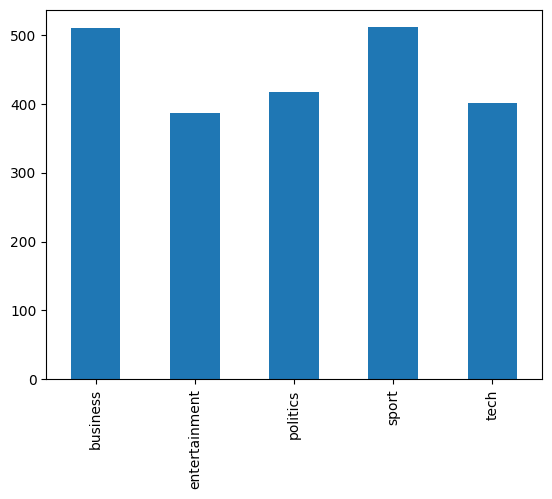

In [16]:
# Distribuições das targets.
y.groupby(y.values).count().plot(kind='bar')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y, random_state=42)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english') # Lista de stopwords da língua inglesa.

# Montando nossa Pipeline e ajustando-a a nossos dados.
pipe1 = Pipeline([('count_vectorizer', CountVectorizer(strip_accents='ascii', stop_words=stop_words))])
X_train_ = pipe1.fit_transform(X_train)
X_test_ = pipe1.transform(X_test)

In [22]:
# Experimentando um Naïve Bayes sobre os dados de teste.
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train_, y_train)
mnb.score(X_test_, y_test)

0.9712746858168761

In [28]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, wordnet
from typing import List

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    
    @staticmethod
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
        
    def __call__(self, doc)->List[str]:
        tokens = word_tokenize(doc)
        tokens_tags = pos_tag(tokens)
        return [self.wnl.lemmatize(token, pos=self.get_wordnet_pos(pos)) for token, pos in tokens_tags]

In [40]:
# Montando nossa Pipeline e ajustando-a a nossos dados.
pipe2 = Pipeline([('count_vectorizer', CountVectorizer(strip_accents='ascii', tokenizer=LemmaTokenizer(), stop_words=stop_words))])
X_train_ = pipe2.fit_transform(X_train)
X_test_ = pipe2.transform(X_test)

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************